In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

%matplotlib inline

In [2]:
circuit = QuantumCircuit(3,4)

### Teleportation of q0 state to q2

The teleportaion algorithm is used to tranfer the state of one qubit to other qubit. In this programe we will try to tranfer the state of q0 to q1. At the start the state of q0 is zero, so we'll apply the x-gate to change it to one and then tranfer it to q2.


In [3]:
circuit.x(0) # X gate
circuit.measure(0,0)
circuit.barrier() # barrier for better visualization
circuit.h(1) # H gate
circuit.cx(1,2) # Controlled-X gate 
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [1,2]) # Measurement gate
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2) # CZ gate

circuit.measure(2,3)

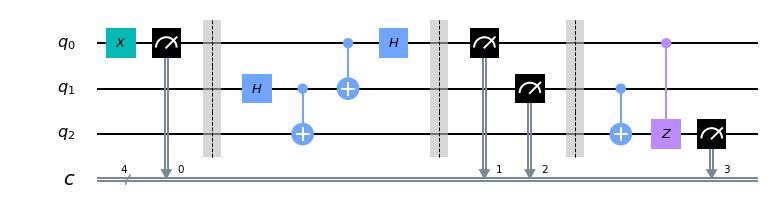

In [4]:
circuit.draw(output= 'mpl')

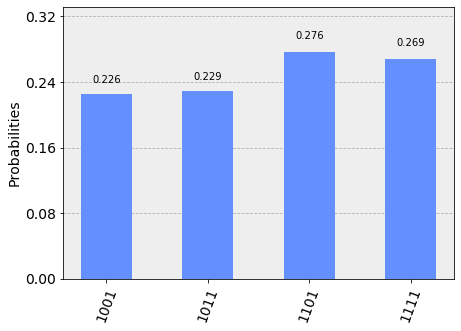

In [5]:
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator).result()
count = result.get_counts()

plot_histogram(count)

### Interpretation

The number on x-axis represent the state of qubits in sequence c3, c2, c1 and c0. For example output 1001 represent c3=1, c2=0, c1=0, c0=1.

So as you can see in every output starting state of q0 (c0) and state of q2 (c3) is same. 
